# Task 2

In [145]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# 1)  Linear Regression on Housing Price

### Import packages and dataset

In [146]:
# import numpy, pandas, matplotlib, seaborn
# add code here

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

**Read housing_data.csv using pandas and call head() to show first few records.**

In [147]:
# add code here

housing_path = "/content/gdrive/MyDrive/synapse_w2/housing_data.csv"

housing_df = pd.read_csv(housing_path)
housing_df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


### Exloratory Data Analysis (EDA)

**'info()' method to check the data types and number**

In [148]:
# add code here

housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


**Get the statistical summary of the data set**

In [149]:
# add code here

housing_df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


**Print the names of the columns(features)**

In [150]:
# add code here

print('{}'.format('\n'.join(housing_df.columns)))

Avg. Area Income
Avg. Area House Age
Avg. Area Number of Rooms
Avg. Area Number of Bedrooms
Area Population
Price
Address


### Basic plotting and visualization

**The target quantity is price. Let us see its distribution.** <br>
Plot a histogram of Price. Choose the number of bins by experimenting a little. (Expected: a bell curve shape)

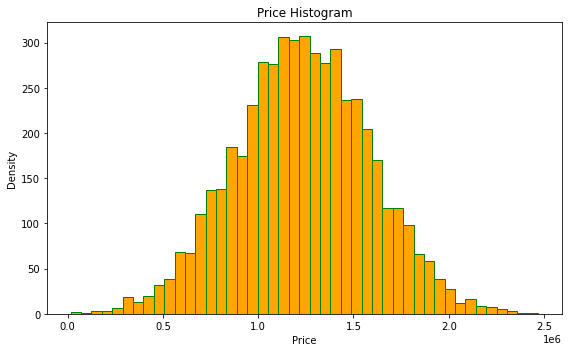

In [151]:
# add code here

fig, ax = plt.subplots(figsize = (8, 5))
ax.hist(housing_df['Price'], bins = 'auto', color = 'orange',
        edgecolor = 'green')
ax.set_title('Price Histogram')
ax.set_xlabel('Price')
ax.set_ylabel('Density')
plt.tight_layout()

**Let us see how the different features are correlated with each other by printing a Correlation Matrix**

In [152]:
# add code here

housing_df.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


### Feature and variable sets

**Make a list of data frame column names**<br>
**Create a new dataframe containing all the numerical training features(note that Address is a string so ignore that) and store it in a variable called "X"**<br><br>
**Then create a new dataframe containing the target (Price) and store it in a variable called "y"**

In [153]:
# add code here
# This code should print (5000, 5) and (5000,) if everything is correct

column_names_housing = list(housing_df.columns)

X = pd.DataFrame(housing_df).drop(['Price', 'Address'], axis = 1)

y = pd.DataFrame(housing_df)['Price']

print(X.shape, y.shape)

(5000, 5) (5000,)


In [154]:
# print a few record of X
# add code here

X.head(10)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472
5,80175.754159,4.988408,6.104512,4.04,26748.428425
6,64698.463428,6.025336,8.147760,3.41,60828.249085
7,78394.339278,6.989780,6.620478,2.42,36516.358972
8,59927.660813,5.362126,6.393121,2.30,29387.396003
9,81885.927184,4.423672,8.167688,6.10,40149.965749


In [155]:
# print a few record of y
# add code here

y.head(10)

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
5    1.068138e+06
6    1.502056e+06
7    1.573937e+06
8    7.988695e+05
9    1.545155e+06
Name: Price, dtype: float64

### Test-train split

**Import train_test_split function from scikit-learn**

In [156]:
# add code here

from sklearn.model_selection import train_test_split

**Create X and y train and test splits in one command using a test size of 0.3 and a random seed**<br>
They should be called X_train, X_test, y_train, y_test

In [157]:
# add code here

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, 
                                                    random_state = 20212008)

**Print the size and shape of each of the train/test splits (it should be in the ratio as per test_size parameter above)**

In [158]:
# add code here

print('The size of X_train is {} and X_test is {}'.format(X_train.size, X_test.size))
print('The size of y_train is {} and y_test is {}'.format(y_train.size, y_test.size))
print('The shape of X_train is {} and X_test is {}'.format(X_train.shape, X_test.shape))
print('The shape of y_train is {} and y_test is {}'.format(y_train.shape, y_test.shape))

The size of X_train is 17500 and X_test is 7500
The size of y_train is 3500 and y_test is 1500
The shape of X_train is (3500, 5) and X_test is (1500, 5)
The shape of y_train is (3500,) and y_test is (1500,)


### Model fit and training

**Import LinearRegression and metrics from scikit-learn**

In [159]:
# add code for imports here

from sklearn.linear_model import LinearRegression
import sklearn.metrics as skm

# Create a Linear Regression object 'lm' by calling LinearRegression()
# add code here
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Fit the model on to the instantiated object itself using the X_train and y_train created earlier. No need to create another variable**

In [160]:
# add code here
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Prediction, error estimate, and regression evaluation matrices

**Prediction using the lm model**<br>
Use model.predict() on X_test and store them in a variable called "predictions".<br>
Print type and size of the predictions. Size should be (1500,) if everything is correct.

In [161]:
# add code here

predictions = lm.predict(X_test)
print(type(predictions))
predictions.shape

<class 'numpy.ndarray'>


(1500,)

**Since we're done with our predictions, let's compare it with y_test and see how accurate our predictions are.<br> Plot a Scatter plot of predicted price and y_test set to see if the data fall on a 45 degree straight line**

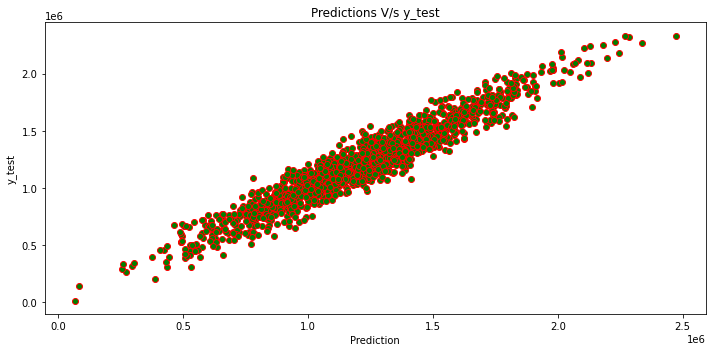

In [162]:
# add code here

fig, ax = plt.subplots(figsize = (10, 5))
ax.scatter(predictions, y_test, color = 'green', edgecolors = 'red',
           linewidths = 1)
ax.set_title('Predictions V/s y_test')
ax.set_xlabel('Prediction')
ax.set_ylabel('y_test')
plt.tight_layout()

**Print the R-square value and round it to 3 decimal places**

In [163]:
# add code here

R_square = round(skm.r2_score(predictions, y_test), 3)
R_square

0.913

# 2) K-nearest neighbor Classification

### Import packages and dataset

In [164]:
# import numpy, pandas, matplotlib, seaborn
# add code here

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

**Read classified_data.txt using pandas and call head() to show first few records. Call this dataframe "df"**

In [165]:
# add code here

classified_path = "/content/gdrive/MyDrive/synapse_w2/classified_data.txt"

df = pd.read_csv(classified_path)
df.head(10)

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1
5,5,0.833928,1.523302,1.104743,1.021139,1.107377,1.010930,1.279538,1.280677,0.510350,1.528044,0
6,6,0.944705,1.251761,1.074885,0.286473,0.996440,0.428860,0.910805,0.755305,1.111800,1.110842,0
7,7,0.816174,1.088392,0.895343,0.243860,0.943123,1.045131,1.146536,1.341886,1.225324,1.425784,0
8,8,0.776551,1.463812,0.783825,0.337278,0.742215,1.072756,0.880300,1.312951,1.118165,1.225922,0
9,9,0.772280,0.515111,0.891596,0.940862,1.430568,0.885876,1.205231,0.596858,1.542580,0.981879,1


### Exloratory Data Analysis (EDA)

**'info()' method to check the data types and number**

In [166]:
# add code here

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1000 non-null   int64  
 1   WTT           1000 non-null   float64
 2   PTI           1000 non-null   float64
 3   EQW           1000 non-null   float64
 4   SBI           1000 non-null   float64
 5   LQE           1000 non-null   float64
 6   QWG           1000 non-null   float64
 7   FDJ           1000 non-null   float64
 8   PJF           1000 non-null   float64
 9   HQE           1000 non-null   float64
 10  NXJ           1000 non-null   float64
 11  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(2)
memory usage: 93.9 KB


**Get the statistical summary of the data set**

In [167]:
# add code here

df.describe()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,499.500000,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,288.819436,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.000000,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,249.750000,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,499.500000,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,749.250000,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,999.000000,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


### Check the spread of the features

**Store the column names in a list**

In [168]:
# add code here

column_names_classified = list(df.columns)
column_names_classified

['Unnamed: 0',
 'WTT',
 'PTI',
 'EQW',
 'SBI',
 'LQE',
 'QWG',
 'FDJ',
 'PJF',
 'HQE',
 'NXJ',
 'TARGET CLASS']

**Run a 'for' loop to draw boxplots of all the features for '0' and '1' TARGET CLASS**

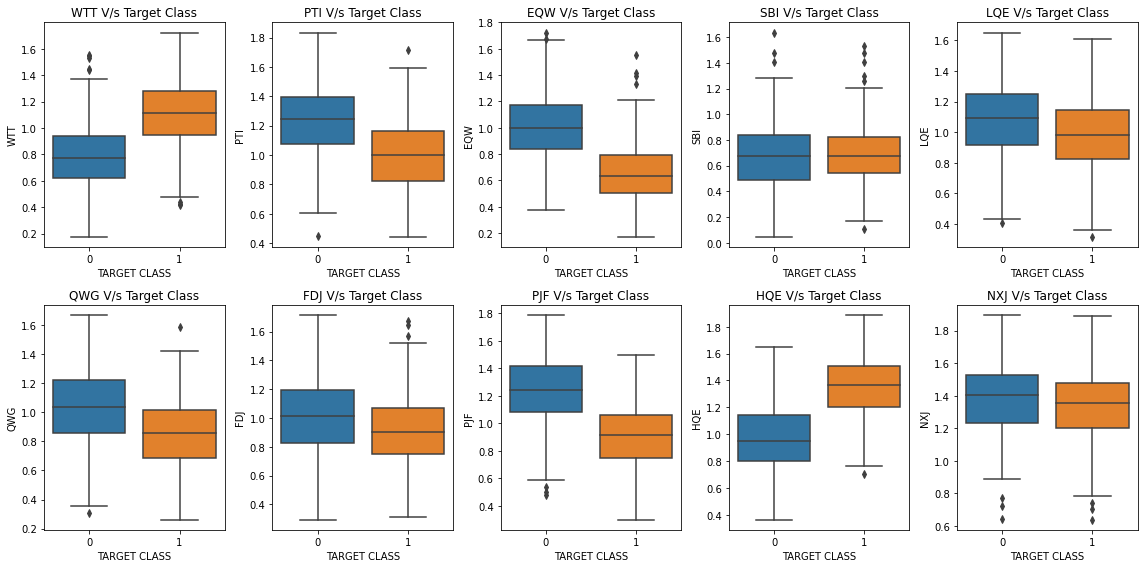

In [169]:
# add code here

fig, ax = plt.subplots(2, 5, figsize = (16, 8))

j = 0
for col in df.drop(['Unnamed: 0', 'TARGET CLASS'], axis = 1) :
  if j < 5 :
    sns.boxplot(x = df['TARGET CLASS'], y = df[col], ax = ax[0][j])
    ax[0][j].set_title('{} V/s Target Class'.format(col))
  else :
    sns.boxplot(x = df['TARGET CLASS'], y = df[col], ax = ax[1][j-5]) 
    ax[1][j-5].set_title('{} V/s Target Class'.format(col))
  j += 1   

plt.tight_layout()

### Standardize the features using sklearn.preprocessing 
Why should we standardize?<br>
Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus, to deal with this potential problem feature-wise standardized (μ=0, σ=1) is usually used prior to model fitting

**import StandardScaler from Sklearn and instantiate it to a variable called "scaler"**

In [170]:
# add code here

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

**Fit only the features data to this scaler (leaving the TARGET CLASS column out) and then transform**

In [171]:
# add code here

scaler.fit(df.drop(['TARGET CLASS'], axis = 1))
scaled_data = scaler.transform(df.drop(['TARGET CLASS'], axis = 1))

**Scaler.transform() will return an array. We need to convert this into a dataframe. Do this and add the column names to the dataframe. Call this new dataframe as "df_feat". Call head() on this df**

In [172]:
# add code here

df_feat = pd.DataFrame(scaled_data)
df_feat.columns = column_names_classified[:-1]
df_feat.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-1.730320,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.726856,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-1.723391,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,-1.719927,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,-1.716463,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


### Train/Test split

**Set X to be equal to df_feat and set y accordingly. As you know, X contains our training features and y contains our target.**

In [173]:
# add code here

X = df_feat
 
y = pd.DataFrame(df['TARGET CLASS'])

In [174]:
X.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-1.730320,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.726856,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-1.723391,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,-1.719927,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,-1.716463,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [175]:
y.head()

,TARGET CLASS
0,1
1,0
2,0
3,1
4,1


**Import train_test_split function from scikit-learn**<br>
**Create X and y train and test splits in one command using a test size of 0.3 and a random seed**<br>
They should be called X_train, X_test, y_train, y_test

In [176]:
# add code here

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, 
                                                    random_state = 20212008)

In [177]:
print('The size of X_train is {} and X_test is {}'.format(X_train.size, X_test.size))
print('The size of y_train is {} and y_test is {}'.format(y_train.size, y_test.size))
print('The shape of X_train is {} and X_test is {}'.format(X_train.shape, X_test.shape))
print('The shape of y_train is {} and y_test is {}'.format(y_train.shape, y_test.shape))

The size of X_train is 7700 and X_test is 3300
The size of y_train is 700 and y_test is 300
The shape of X_train is (700, 11) and X_test is (300, 11)
The shape of y_train is (700, 1) and y_test is (300, 1)


### Model fit and training

**import KNeighborsClassifier from sklearn and initialize it with neighbours = 1. Fit this on X_train and y_train**

In [178]:
# add code here

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train.values.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

**Using this fitted model, predict on X_test. Store these predictions in variable called pred.**

In [179]:
# add code here

pred = knn.predict(X_test)

**Let us check how correct these predictions are.<br>
Print a classification report of y_test and pred**

In [180]:
# add code here

from sklearn.metrics import classification_report

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91       147
           1       0.91      0.92      0.91       153

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



**Print the accuracy using numpy and round it to 3 decimal places.**

In [181]:
# add code here

true_values = np.array(y_test['TARGET CLASS'])
prediction_values = np.array(pred)

acc = (true_values == prediction_values).sum() / true_values.shape[0]
print(f'The accuracy is : {round(acc, 3)}')

The accuracy is : 0.91


### Choosing optimal 'k'

**Above, we chose n_neighbours to be equal to 1. Choosing a small value of K leads to unstable decision boundaries. <br>
We need to select n_neighbours by calculating the accuracy for every value of n from 1 to 60 and then choosing the one which gives the highest accuracy.**

In [182]:
# Do the same as we did above, but this time make a loop from n = 1 to n = 60 and append the accuracy
# for each in a list

# add code here

def accuracy_fun(n) :
  knn = KNeighborsClassifier(n_neighbors = n)
  knn.fit(X_train, y_train.values.ravel())

  pred = knn.predict(X_test)

  true_values = np.array(y_test['TARGET CLASS'])
  prediction_values = np.array(pred)

  acc = (true_values == prediction_values).sum() / true_values.shape[0]

  return acc


acc_list = []
for n in range(1, 61) :
  acc_list.append(accuracy_fun(n))

acc_list

[0.91,
 0.8866666666666667,
 0.9066666666666666,
 0.9133333333333333,
 0.92,
 0.92,
 0.93,
 0.93,
 0.93,
 0.9366666666666666,
 0.9333333333333333,
 0.93,
 0.9333333333333333,
 0.9333333333333333,
 0.9366666666666666,
 0.9366666666666666,
 0.9366666666666666,
 0.9366666666666666,
 0.9366666666666666,
 0.9366666666666666,
 0.94,
 0.9366666666666666,
 0.94,
 0.9366666666666666,
 0.94,
 0.9366666666666666,
 0.9366666666666666,
 0.9366666666666666,
 0.9366666666666666,
 0.94,
 0.9366666666666666,
 0.9366666666666666,
 0.9366666666666666,
 0.9366666666666666,
 0.9366666666666666,
 0.93,
 0.9333333333333333,
 0.9366666666666666,
 0.9333333333333333,
 0.9366666666666666,
 0.94,
 0.9366666666666666,
 0.94,
 0.9366666666666666,
 0.9366666666666666,
 0.9366666666666666,
 0.9333333333333333,
 0.94,
 0.9366666666666666,
 0.94,
 0.94,
 0.94,
 0.9433333333333334,
 0.94,
 0.94,
 0.94,
 0.94,
 0.94,
 0.94,
 0.94]

**Plot a graph of K value vs Accuracy**

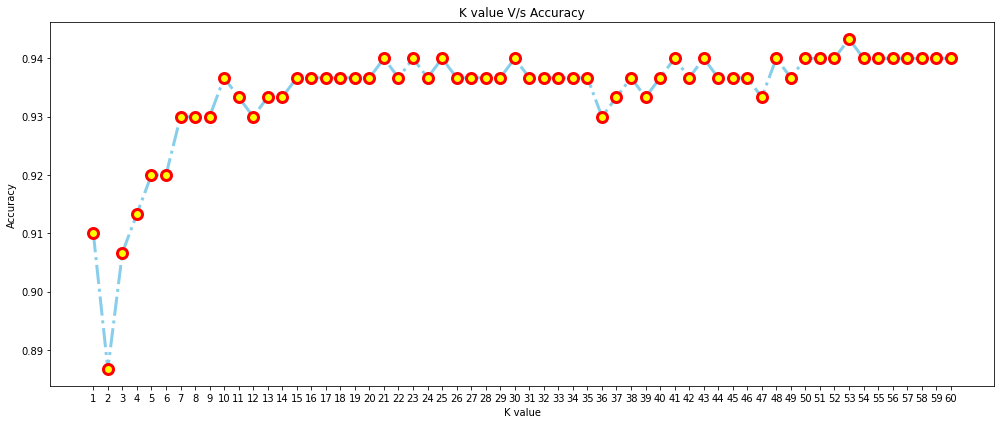

In [183]:
# add code here

fig, ax = plt.subplots(figsize = (14, 6))
ax.plot(range(1, 61), acc_list, marker = 'o', color = '#87CEEB',
        ms = 10, mfc = 'yellow', mec = 'red', mew = 3,
        linestyle = '-.', linewidth = 3)
ax.set_title('K value V/s Accuracy')
ax.set_xlabel('K value')
ax.set_xticks(range(1, 61))
ax.set_ylabel('Accuracy')
plt.tight_layout()

**Choose the best value of n_neighbours and give a reason why and also print the accuracy**

In [184]:
# add code here 

"""
Choosing the value of n_neighbors as 53 because it gives maximum accuracy, i.e., 
the value which gives minimum error rate, since it will increase the accuracy of 
the model.
"""

print(__doc__)
print(f'The accuracy at K value 53 is: {accuracy_fun(53)}')


Choosing the value of n_neighbors as 53 because it gives maximum accuracy, i.e., 
the value which gives minimum error rate, since it will increase the accuracy of 
the model.

The accuracy at K value 53 is: 0.9433333333333334


# 3). Decision Tree Classifier

<b>read the titanic_data.csv using pandas and show the dataframe</b>

In [185]:
#write code here

titanic_path = "/content/gdrive/MyDrive/synapse_w2/titanic_data.csv"

titanic_df = pd.read_csv(titanic_path)
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<b>Write a function which accepts a dataframe, preprocesses the data (use task 1 notebook) and returns a new dataframe. </b> 

In [186]:
def titanic_preprocessing_pipeline(df) :
  df = adding_title(df)

  df.drop(['PassengerId', 'Ticket', 'Name'], axis = 1, inplace = True)

  df = nan_analysis(df)

  df = extra_features(df)

  df['Age'] = normalize_fun(df, 'Age')
  df['Fare'] = normalize_fun(df, 'Fare')
  df['Family_members'] = normalize_fun(df, 'Family_members')

  df = one_hot_encoding(df)

  return df


# Adding the title column
def adding_title(title_df) :
  import re

  title = []
  for title_df_name in title_df['Name'] :
    title_search = re.search('(\w+)\.', title_df_name)
    title.append(title_search.group(1))

  title_df['Title'] = title

  return title_df

# Function for Nan Analysis
def nan_analysis(nan_df) :
  for item in nan_df :
    if (nan_df[item].isnull().sum() * 100 / len(nan_df)) > 50 :
      nan_df.drop([item], axis = 1, inplace = True)

  nan_df['Embarked'] = nan_df['Embarked'].fillna(nan_df['Embarked'].mode()[0])  
  nan_df['Age'] = nan_df['Age'].fillna(nan_df['Age'].mean())

  return nan_df

# Function for adding and remove features to the dataframe
def extra_features(extra_df) :
  extra_df["Family_members"] = extra_df["SibSp"] + extra_df["Parch"]
  extra_df.drop(['SibSp', 'Parch'], axis = 1, inplace = True)

  return extra_df

# Normalizing data
def normalize_fun(df, col) :
  data_max, data_min = max(df[col]), min(df[col])
  data_normalize = []
  for item in df[col] :
    data_normalize.append((item - data_min) / (data_max - data_min))

  return data_normalize

# Hot Encoding function
def one_hot_encoding(ohe_df) :
  df_ohe = pd.get_dummies(ohe_df, columns=['Pclass', 'Sex', 'Title', 'Embarked'])
  return df_ohe


titanic_df = titanic_preprocessing_pipeline(titanic_df)
titanic_df

,Survived,Age,Fare,Family_members,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Title_Capt,Title_Col,Title_Countess,Title_Don,Title_Dr,Title_Jonkheer,Title_Lady,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Embarked_C,Embarked_Q,Embarked_S
0,0,0.271174,0.014151,0.1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,1,0.472229,0.139136,0.1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,1,0.321438,0.015469,0.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,1,0.434531,0.103644,0.1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,0,0.434531,0.015713,0.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0.334004,0.025374,0.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
887,1,0.233476,0.058556,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
888,0,0.367921,0.045771,0.3,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
889,1,0.321438,0.058556,0.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


<b>extract the y label (survived) from the dataframe and store it in a new variable</b>

In [187]:
#write code here

y_label = titanic_df['Survived']
y_label

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

<b>remove the y_label (survived) from the dataframe</b>

In [188]:
#write code here

titanic_df.drop(['Survived'], axis = 1, inplace = True)
titanic_df

,Age,Fare,Family_members,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Title_Capt,Title_Col,Title_Countess,Title_Don,Title_Dr,Title_Jonkheer,Title_Lady,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Embarked_C,Embarked_Q,Embarked_S
0,0.271174,0.014151,0.1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0.472229,0.139136,0.1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,0.321438,0.015469,0.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,0.434531,0.103644,0.1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,0.434531,0.015713,0.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.334004,0.025374,0.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
887,0.233476,0.058556,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
888,0.367921,0.045771,0.3,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
889,0.321438,0.058556,0.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


<b>Split the data into train and test. (do a split in the ratio 30:70)</b>

In [189]:
#write code here

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(titanic_df, y_label, stratify = y_label, 
                                                    test_size = 0.3, random_state = 20212008)

In [190]:
print('The size of X_train is {} and X_test is {}'.format(X_train.size, X_test.size))
print('The size of y_train is {} and y_test is {}'.format(y_train.size, y_test.size))
print('The shape of X_train is {} and X_test is {}'.format(X_train.shape, X_test.shape))
print('The shape of y_train is {} and y_test is {}'.format(y_train.shape, y_test.shape))

print()
print(f'Test Case:\n{y_test.value_counts(normalize = True)}')

print()
print(f'Train Case:\n{y_train.value_counts(normalize = True)}')

The size of X_train is 17444 and X_test is 7504
The size of y_train is 623 and y_test is 268
The shape of X_train is (623, 28) and X_test is (268, 28)
The shape of y_train is (623,) and y_test is (268,)

Test Case:
0    0.615672
1    0.384328
Name: Survived, dtype: float64

Train Case:
0    0.616372
1    0.383628
Name: Survived, dtype: float64


<b>Now that you have the entire preprocessed and split data, implement the decision tree algorithm from sklearn and fit it to this dataset</b> <br>

Make sure that you play with the hyperparameters to get a good result. You can even use bagging and boosting methods like random forest or adaboost to improve your accuracy. Visualize results, try different hyperparameters by using a loop, GET CREATIVE!<br>

Machine learning is an iteritive process. You will have to keep playing with hyperparameters and algorithms. No fixed algorithm will work on a fixed dataset.

**Decision Tree Classifier**

In [191]:
#write code here

from sklearn.tree import DecisionTreeClassifier

In [192]:
train_accuracy, test_accuracy = [], []

for i in range(1, 15) :
  dt_model = DecisionTreeClassifier(max_depth = i, random_state = 20201008)
  dt_model.fit(X_train, y_train)
  train_accuracy.append(dt_model.score(X_train, y_train))
  test_accuracy.append(dt_model.score(X_test, y_test))

frame_depth = pd.DataFrame({'max_depth' : range(1, 15), 'Train Accuracy' : train_accuracy, 
                      'Test Accuracy' : test_accuracy})

train_accuracy, test_accuracy = [], []

for i in range(2, 21) :
  dt_model = DecisionTreeClassifier(max_depth = 5, max_leaf_nodes = i, random_state = 20201008)
  dt_model.fit(X_train, y_train)
  train_accuracy.append(dt_model.score(X_train, y_train))
  test_accuracy.append(dt_model.score(X_test, y_test))

frame_leaf = pd.DataFrame({'max_leaf_nodes' : range(2, 21), 'Train Accuracy' : train_accuracy, 
                      'Test Accuracy' : test_accuracy})
print(frame_depth)
print()
print(frame_leaf)

    max_depth  Train Accuracy  Test Accuracy
0           1        0.791332       0.761194
1           2        0.791332       0.761194
2           3        0.837881       0.798507
3           4        0.861958       0.828358
4           5        0.869984       0.824627
5           6        0.886035       0.813433
6           7        0.903692       0.761194
7           8        0.924559       0.764925
8           9        0.940610       0.776119
9          10        0.953451       0.772388
10         11        0.964687       0.783582
11         12        0.975923       0.768657
12         13        0.975923       0.768657
13         14        0.982343       0.753731

    max_leaf_nodes  Train Accuracy  Test Accuracy
0                2        0.791332       0.761194
1                3        0.791332       0.761194
2                4        0.826645       0.813433
3                5        0.826645       0.805970
4                6        0.826645       0.805970
5                7      

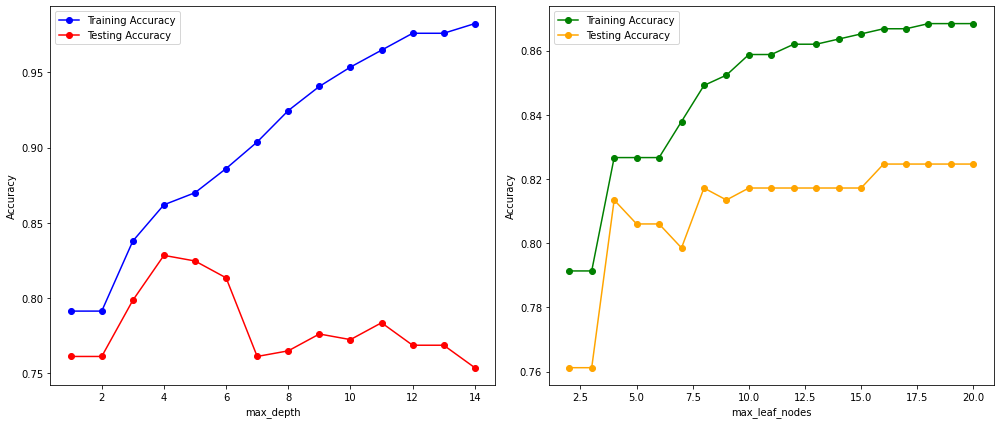

In [193]:
fig, ax = plt.subplots(1, 2, figsize = (14, 6))

ax[0].plot(frame_depth['max_depth'], frame_depth['Train Accuracy'], 
           marker = 'o', label = 'Training Accuracy', color = 'blue')
ax[0].plot(frame_depth['max_depth'], frame_depth['Test Accuracy'], 
           marker = 'o', label = 'Testing Accuracy', color = 'red')
ax[0].set_xlabel('max_depth')
ax[0].set_ylabel('Accuracy')
ax[0].legend()

ax[1].plot(frame_leaf['max_leaf_nodes'], frame_leaf['Train Accuracy'], 
           marker = 'o', label = 'Training Accuracy', color = 'green')
ax[1].plot(frame_leaf['max_leaf_nodes'], frame_leaf['Test Accuracy'], 
           marker = 'o', label = 'Testing Accuracy', color ='orange')
ax[1].set_xlabel('max_leaf_nodes')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

plt.tight_layout()

In [194]:
titanic_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 4,
                                       max_leaf_nodes = 12, random_state= 20201008)

titanic_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=12,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=20201008, splitter='best')

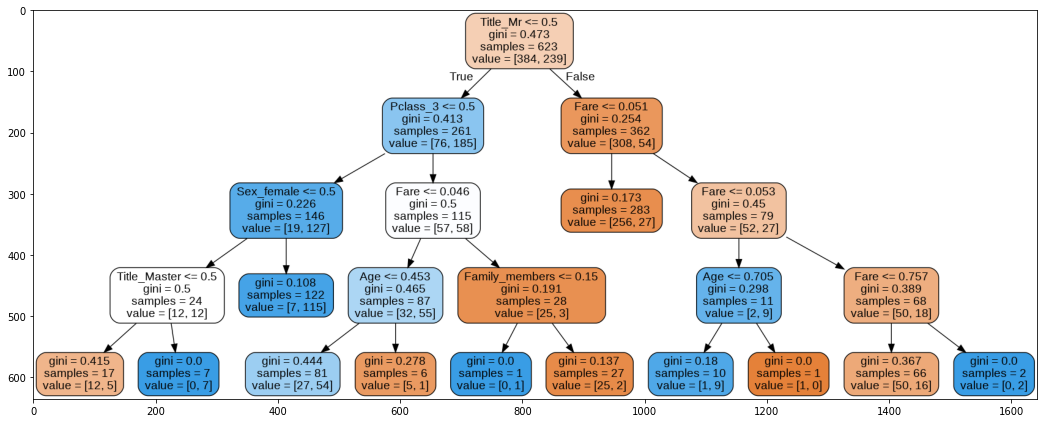

In [195]:
from sklearn import tree

fig, ax = plt.subplots(figsize = (18, 8))
titanic_tree = tree.export_graphviz(titanic_model, out_file = 'titanic_tree.dot', 
                                    filled = True, feature_names = X_train.columns, 
                                    rounded = True)

!dot -Tpng titanic_tree.dot -o titanic_tree.png

img = plt.imread('titanic_tree.png')
plt.imshow(img)

**Random Forest Classifier**

In [196]:
from sklearn.ensemble import RandomForestClassifier

In [197]:
train_accuracy, test_accuracy = [], []

for i in range(1, 15) :
  rfc_model = RandomForestClassifier(max_depth = i, random_state = 20201008)
  rfc_model.fit(X_train, y_train)
  train_accuracy.append(rfc_model.score(X_train, y_train))
  test_accuracy.append(rfc_model.score(X_test, y_test))

frame_depth = pd.DataFrame({'max_depth' : range(1, 15), 'Train Accuracy' : train_accuracy, 
                      'Test Accuracy' : test_accuracy})



train_accuracy, test_accuracy = [], []

for i in range(2, 31) :
  rfc_model = RandomForestClassifier(max_depth = 8, max_leaf_nodes = i, random_state = 20201008)
  rfc_model.fit(X_train, y_train)
  train_accuracy.append(rfc_model.score(X_train, y_train))
  test_accuracy.append(rfc_model.score(X_test, y_test))

frame_leaf = pd.DataFrame({'max_leaf_nodes' : range(2, 31), 'Train Accuracy' : train_accuracy, 
                      'Test Accuracy' : test_accuracy})



train_accuracy, test_accuracy = [], []

for i in range(80, 121) : 
  rfc_model = RandomForestClassifier(n_estimators = i, max_depth = 8, 
                                     max_leaf_nodes = 23, n_jobs = -1,
                                     random_state = 20201008)
  rfc_model.fit(X_train, y_train)
  train_accuracy.append(rfc_model.score(X_train, y_train))
  test_accuracy.append(rfc_model.score(X_test, y_test))

frame_estimators = pd.DataFrame({'max_nodes' : range(80, 121), 'Train Accuracy' : train_accuracy, 
                      'Test Accuracy' : test_accuracy})


print(frame_depth)
print()
print(frame_leaf)
print()
print(frame_estimators)

    max_depth  Train Accuracy  Test Accuracy
0           1        0.792937       0.772388
1           2        0.796148       0.776119
2           3        0.810594       0.787313
3           4        0.839486       0.828358
4           5        0.847512       0.824627
5           6        0.882825       0.817164
6           7        0.895666       0.824627
7           8        0.924559       0.832090
8           9        0.935795       0.813433
9          10        0.950241       0.805970
10         11        0.958266       0.787313
11         12        0.966292       0.794776
12         13        0.974318       0.791045
13         14        0.975923       0.794776

    max_leaf_nodes  Train Accuracy  Test Accuracy
0                2        0.792937       0.772388
1                3        0.792937       0.772388
2                4        0.794543       0.776119
3                5        0.802568       0.791045
4                6        0.820225       0.809701
5                7      

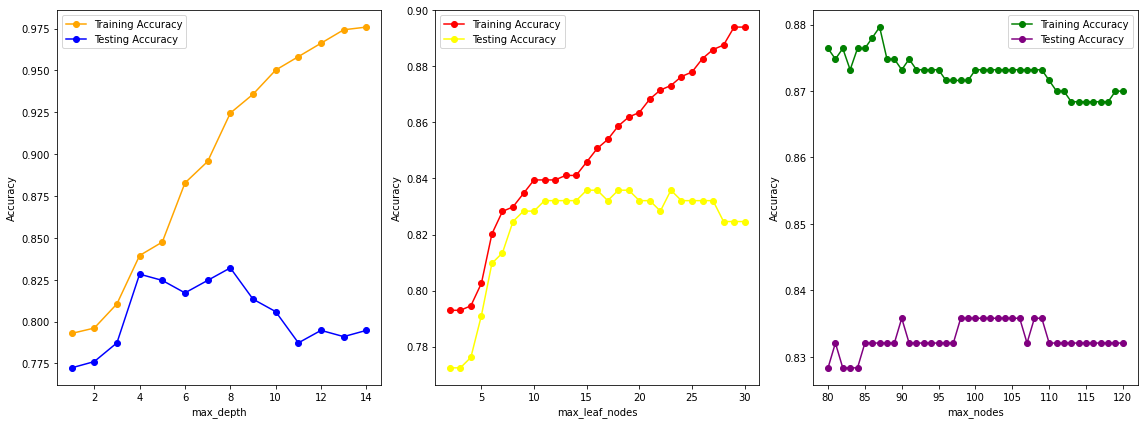

In [198]:
fig, ax = plt.subplots(1, 3, figsize = (16, 6))

ax[0].plot(frame_depth['max_depth'], frame_depth['Train Accuracy'], 
           marker = 'o', label = 'Training Accuracy', color = 'orange')
ax[0].plot(frame_depth['max_depth'], frame_depth['Test Accuracy'], 
           marker = 'o', label = 'Testing Accuracy', color = 'blue')
ax[0].set_xlabel('max_depth')
ax[0].set_ylabel('Accuracy')
ax[0].legend()

ax[1].plot(frame_leaf['max_leaf_nodes'], frame_leaf['Train Accuracy'], 
           marker = 'o', label = 'Training Accuracy', color = 'red')
ax[1].plot(frame_leaf['max_leaf_nodes'], frame_leaf['Test Accuracy'], 
           marker = 'o', label = 'Testing Accuracy', color = 'yellow')
ax[1].set_xlabel('max_leaf_nodes')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

ax[2].plot(frame_estimators['max_nodes'], frame_estimators['Train Accuracy'], 
           marker = 'o', label = 'Training Accuracy', color = 'green')
ax[2].plot(frame_estimators['max_nodes'], frame_estimators['Test Accuracy'], 
           marker = 'o', label = 'Testing Accuracy', color = 'purple')
ax[2].set_xlabel('max_nodes')
ax[2].set_ylabel('Accuracy')
ax[2].legend()

plt.tight_layout()

**AdaBoost Classifier**

In [199]:
from sklearn.ensemble import AdaBoostClassifier

In [200]:
train_accuracy, test_accuracy = [], []

l = [0.00001, 0.0001, 0.001, 0.005, 0.01, 0.04, 0.05, 0.08, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
for i in l :
  abc_model = AdaBoostClassifier(n_estimators = 50, learning_rate = i, 
                                 base_estimator = DecisionTreeClassifier(max_depth = 4, 
                                                                         max_leaf_nodes = 12, random_state = 20201008),
                                 random_state = 20201008)
  abc_model.fit(X_train, y_train)
  train_accuracy.append(abc_model.score(X_train, y_train))
  test_accuracy.append(abc_model.score(X_test, y_test))

frame_learning = pd.DataFrame({'learning_rate' : l, 'Train Accuracy' : train_accuracy, 
                               'Test Accuracy' : test_accuracy})



train_accuracy, test_accuracy = [], []

for i in range(21, 61) :
  abc_model = AdaBoostClassifier(n_estimators = i, learning_rate = 0.001, 
                                 base_estimator = DecisionTreeClassifier(max_depth = 4, 
                                                                         max_leaf_nodes = 12, random_state= 20201008),
                                 random_state = 20201008)
  abc_model.fit(X_train, y_train)
  train_accuracy.append(abc_model.score(X_train, y_train))
  test_accuracy.append(abc_model.score(X_test, y_test))

frame_estimators = pd.DataFrame({'n_estimators' : range(21, 61), 'Train Accuracy' : train_accuracy, 
                                 'Test Accuracy' : test_accuracy})



print(frame_learning)
print()
print(frame_estimators)

    learning_rate  Train Accuracy  Test Accuracy
0         0.00001        0.861958       0.828358
1         0.00010        0.861958       0.828358
2         0.00100        0.865169       0.824627
3         0.00500        0.868379       0.820896
4         0.01000        0.868379       0.817164
5         0.04000        0.922953       0.779851
6         0.05000        0.922953       0.802239
7         0.08000        0.955056       0.794776
8         0.10000        0.955056       0.794776
9         0.20000        0.975923       0.746269
10        0.30000        0.982343       0.761194
11        0.40000        0.982343       0.742537
12        0.50000        0.982343       0.791045
13        0.60000        0.982343       0.738806
14        0.70000        0.982343       0.753731
15        0.80000        0.982343       0.712687
16        0.90000        0.982343       0.776119
17        1.00000        0.982343       0.779851

    n_estimators  Train Accuracy  Test Accuracy
0             21    

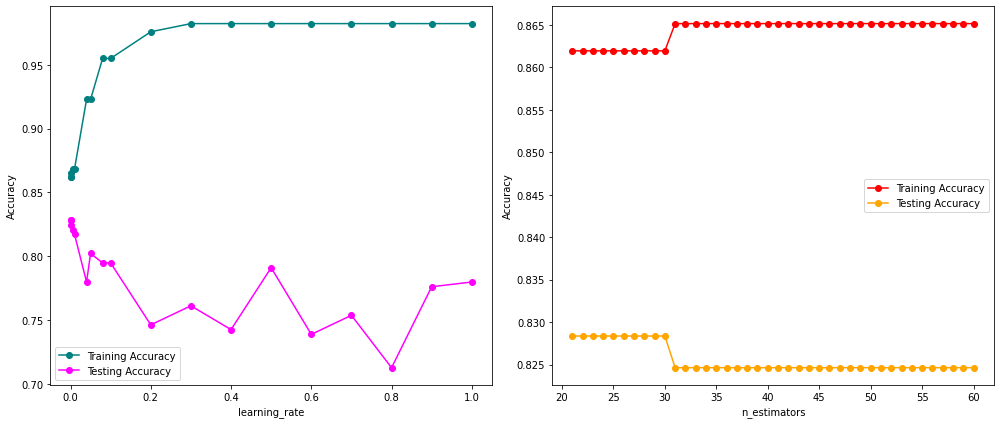

In [201]:
fig, ax = plt.subplots(1, 2, figsize = (14, 6))

ax[0].plot(frame_learning['learning_rate'], frame_learning['Train Accuracy'], 
           marker = 'o', label = 'Training Accuracy', color = 'teal')
ax[0].plot(frame_learning['learning_rate'], frame_learning['Test Accuracy'], 
           marker = 'o', label = 'Testing Accuracy', color = 'magenta')
ax[0].set_xlabel('learning_rate')
ax[0].set_ylabel('Accuracy')
ax[0].legend()

ax[1].plot(frame_estimators['n_estimators'], frame_estimators['Train Accuracy'], 
           marker = 'o', label = 'Training Accuracy', color = 'red')
ax[1].plot(frame_estimators['n_estimators'], frame_estimators['Test Accuracy'], 
           marker = 'o', label = 'Testing Accuracy', color = 'orange')
ax[1].set_xlabel('n_estimators')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

plt.tight_layout()

<b>print the test accuracy and train accuracy here</b>

In [202]:
#write code here

titanic_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 4,
                                       max_leaf_nodes = 12, random_state= 20201008)

titanic_model.fit(X_train, y_train)

print('With Decision Tree :\nTraining Accuracy : {}\nTesting Accuracy : {}'.format(titanic_model.score(X_train, y_train), titanic_model.score(X_test, y_test)))
print()


titanic_model = RandomForestClassifier(criterion = 'gini', n_estimators = 100, 
                                       max_depth = 8, max_leaf_nodes = 23, 
                                       n_jobs = -1, random_state= 20201008)

titanic_model.fit(X_train, y_train)

print('With Random Forest :\nTraining Accuracy : {}\nTesting Accuracy : {}'.format(titanic_model.score(X_train, y_train), titanic_model.score(X_test, y_test)))
print()

titanic_model = AdaBoostClassifier(n_estimators = 30, learning_rate = 0.001, 
                                   base_estimator = DecisionTreeClassifier(max_depth = 4, 
                                                                           max_leaf_nodes = 12, random_state= 20201008), 
                                   random_state = 20201008)

titanic_model.fit(X_train, y_train)

print('With Adaboost :\nTraining Accuracy : {}\nTesting Accuracy : {}'.format(titanic_model.score(X_train, y_train), titanic_model.score(X_test, y_test)))

With Decision Tree :
Training Accuracy : 0.8619582664526485
Testing Accuracy : 0.8283582089552238

With Random Forest :
Training Accuracy : 0.8731942215088283
Testing Accuracy : 0.835820895522388

With Adaboost :
Training Accuracy : 0.8619582664526485
Testing Accuracy : 0.8283582089552238


In [203]:
from sklearn.model_selection import GridSearchCV

param_g = {'n_estimators' : [100], 'learning_rate' : [0.001]}
grid_model = GridSearchCV(titanic_model, param_grid = param_g, scoring = 'roc_auc')
grid_model.fit(X_train, y_train)
print('With GridSearchCV :\nTraining Accuracy : {}\nTesting Accuracy : {}'.format(grid_model.score(X_train, y_train), dt_model.score(X_test, y_test)))

With GridSearchCV :
Training Accuracy : 0.9070998953974895
Testing Accuracy : 0.8246268656716418
